In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.optim as optim
from torch import nn
from sklearn.preprocessing import StandardScaler
import torch
import os
from config import DATA_DIR
from sklearn.model_selection import train_test_split

In [141]:
datapath = os.path.join(DATA_DIR, 'Credit Card Fraud Detection Dataset 2023/creditcard_2023.csv')
data = pd.read_csv(datapath)

print(data.tail())
print(data.shape)

            id        V1        V2        V3        V4        V5        V6  \
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V21       V22       V23  \
568625 -0.370393  0.189694 -0.938153  ...  0.167503  0.419731  1.288249   
568626 -0.016935 -0.147733  0.483894  ...  0.031874  0.388161 -0.154257   
568627 -0.070958 -0.019997 -0.122048  ...  0.140788  0.536523 -0.211100   
568628  0.580568 -0.207723  0.893527  ... -0.060381 -0.195609 -0.175488   
568629 -0.347613 -0.340814  0.253971  ...  0.534853 -0.291514  0.157303   

             V24       V25       V26       V27       V28    Amount  Class  
5686

In [142]:
def Standardize(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

In [143]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print(type(X_train), type(X_test), type(y_train), type(y_test))

X_train,X_test = Standardize(X_train,X_test)


print(y_train.dtype)  # 检查 y_train 的数据类型
print(y_test.dtype)   # 检查 y_test 的数据类型


X_train = torch.tensor(X_train,dtype=torch.float)
X_test = torch.tensor(X_test,dtype=torch.float)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.int64)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.int64)



(454904, 30) (113726, 30) (454904,) (113726,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
int64
int64


In [144]:
class SimpleNN(nn.Module):
    def __init__(self, n_features):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(n_features, 50)
        self.fc2 = nn.Linear(50, 60)
        self.fc3 = nn.Linear(60, 70)
        self.fc4 = nn.Linear(70, 80)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [145]:
def train_model(model, X_train, y_train,optimizer, criterion, epochs=120):
    model.train()
    
    history = {"loss":[],"acc":[]}
    
    for epoch in range(epochs):
        optimizer.zero_grad()
        
        outputs = model(X_train)
        
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(probs.data, 1)
        
        correct = torch.sum(predicted == y_train)
        accuracy = correct/len(y_train)
        
        history["loss"].append(loss.item())
        history["acc"].append(accuracy)
        
        print(f"epoch: {epoch}, loss: {loss.item():.4f}, acc: {accuracy:.4f}")
        
    return history
        

In [146]:
def test_model(model, X_test, y_test, criterion):
    model.eval()
    
    
    
    with torch.no_grad():
        outputs = model(X_test)
        loss = criterion(outputs, y_test)
        _, predicted = torch.max(outputs.data, 1)
        correct = torch.sum(predicted == y_test)
        accuracy = correct/len(y_test)
        
        history["loss"].append(loss.item())
        history["acc"].append(accuracy)
        
        print(f"loss: {loss.item()},Accuracy: {accuracy:.4f}")
        
        return loss, accuracy
        

In [147]:
def plot(history):
    plt.subplots(figsize=(10, 5))
    plt.plot(history['loss'], label='loss')
    plt.plot(history['acc'], label='acc')
    plt.title('Training and validation loss and accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

training model
epoch: 0, loss: 4.4037, acc: 0.0000
epoch: 1, loss: 4.3811, acc: 0.0000
epoch: 2, loss: 4.3589, acc: 0.0000
epoch: 3, loss: 4.3365, acc: 0.0000
epoch: 4, loss: 4.3135, acc: 0.0002
epoch: 5, loss: 4.2894, acc: 0.0037
epoch: 6, loss: 4.2638, acc: 0.0516
epoch: 7, loss: 4.2363, acc: 0.2208
epoch: 8, loss: 4.2064, acc: 0.4875
epoch: 9, loss: 4.1738, acc: 0.7167
epoch: 10, loss: 4.1380, acc: 0.8371
epoch: 11, loss: 4.0986, acc: 0.8707
epoch: 12, loss: 4.0550, acc: 0.8715
epoch: 13, loss: 4.0067, acc: 0.8664
epoch: 14, loss: 3.9530, acc: 0.8612
epoch: 15, loss: 3.8932, acc: 0.8568
epoch: 16, loss: 3.8266, acc: 0.8533
epoch: 17, loss: 3.7525, acc: 0.8503
epoch: 18, loss: 3.6701, acc: 0.8482
epoch: 19, loss: 3.5785, acc: 0.8465
epoch: 20, loss: 3.4769, acc: 0.8455
epoch: 21, loss: 3.3644, acc: 0.8449
epoch: 22, loss: 3.2403, acc: 0.8451
epoch: 23, loss: 3.1036, acc: 0.8456
epoch: 24, loss: 2.9538, acc: 0.8465
epoch: 25, loss: 2.7907, acc: 0.8478
epoch: 26, loss: 2.6144, acc: 0.8

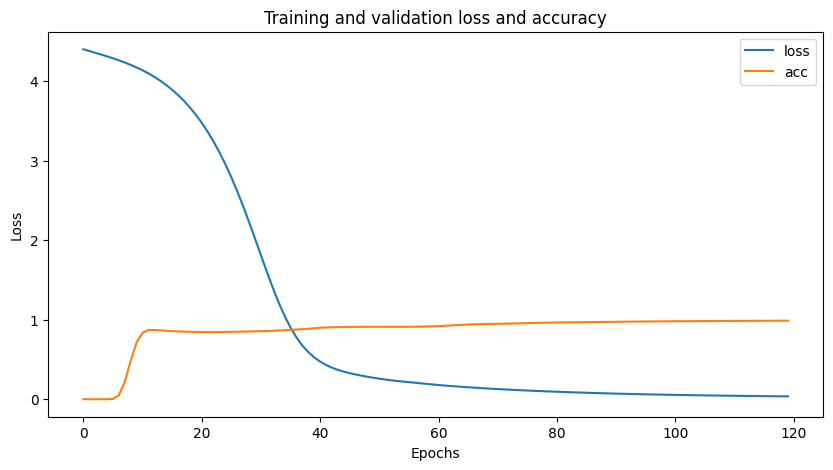

testing model
loss: 0.03618934378027916,Accuracy: 0.9879


(tensor(0.0362), tensor(0.9879))

In [148]:
model = SimpleNN(X_train.shape[1])
#定义损失函数模型
criterion = nn.CrossEntropyLoss()
#定义权重偏置模型
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("training model")
history = train_model(model, X_train,y_train,optimizer,criterion)

plot(history)

print("testing model")
test_model(model, X_test, y_test, criterion)